In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('Datasets/Employee+Demographics.csv')

df.head()

,JobTitle,Sex,Race,JobType,StartYear
0,Management Specialist,M,White,Permanent-Full Time,2000
1,Fire/EMS Lieutenant,M,White,Permanent-Full Time,1996
2,Police Corporal,F,White,Permanent-Full Time,2004
3,Police Chief,M,White,Permanent-Full Time,1990
4,Firefighter/EMT II,M,White,Permanent-Full Time,2003


In [7]:
df.describe()

,StartYear
count,3608.000000
mean,2007.260809
std,8.943149
min,1969.000000
25%,2001.000000
50%,2009.000000
75%,2015.000000
max,2018.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3608 entries, 0 to 3607
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   3608 non-null   object
 1   Sex        3608 non-null   object
 2   Race       3608 non-null   object
 3   JobType    3608 non-null   object
 4   StartYear  3608 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 141.1+ KB


In [9]:
df['JobType'].unique()

array(['Permanent-Full Time', 'Permanent-Part Time',
       'Limited Term Part Time', 'Limited Term Full Time',
       'Overstrength Full Time'], dtype=object)

In [10]:
race_ct = df['Race'].value_counts()
total = df.value_counts().sum() # integer


In [11]:
race_ptgs = round((race_ct/total) * 100,2)
race_ptgs

White                                49.56
Black or African American            27.00
Hispanic or Latino                   15.60
Asian                                 6.32
Unkonwn Race                          0.83
Two or more Races                     0.42
Native Hawaiian or Other Pacific      0.25
American Indian or Alaskan Native     0.03
Name: Race, dtype: float64

In [12]:
sex_counts = df['Sex'].value_counts()
sex_percentages = round((sex_counts / total) * 100,2)
sex_percentages 


M    53.96
F    46.04
Name: Sex, dtype: float64

Text(0.5, 1.0, 'Sex Distribution')

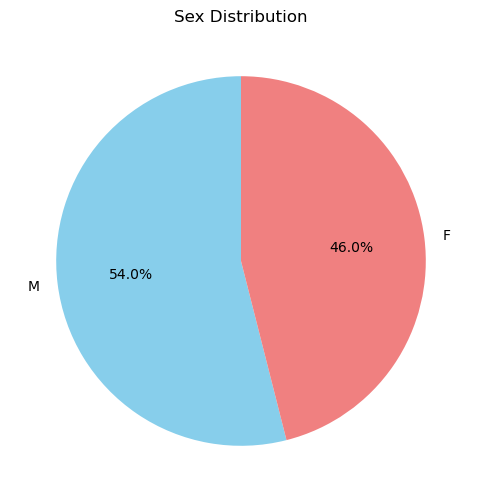

In [13]:
sex_percentages.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90 ,
    colors=['skyblue', 'lightcoral'], 
    labels=sex_percentages.index,
    figsize=(6, 6)  
)
plt.ylabel('')
plt.title('Sex Distribution')

In [14]:
race_sex_cts = df.groupby(['Race','Sex']).size().reset_index(name='cts').sort_values(by='cts',ascending= False)
race_sex_cts 

,Race,Sex,cts
14,White,M,1047
13,White,F,741
3,Black or African American,F,493
4,Black or African American,M,481
5,Hispanic or Latino,F,303
6,Hispanic or Latino,M,260
2,Asian,M,133
1,Asian,F,95
11,Unkonwn Race,F,19
12,Unkonwn Race,M,11


In [15]:
from textwrap import wrap

def wrapText(texts):
    wrapped_texts = ['\n'.join(wrap(label, 8)) for label in texts]
    return wrapped_texts
def createLabel(ax):
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                ax.text(
                bar.get_x() + bar.get_width() / 2,  # x-coordinate of text
                height,  # y-coordinate of text
                f'{height:.0f}',  # Text to display
                ha='center', va='bottom', fontsize=10
            )



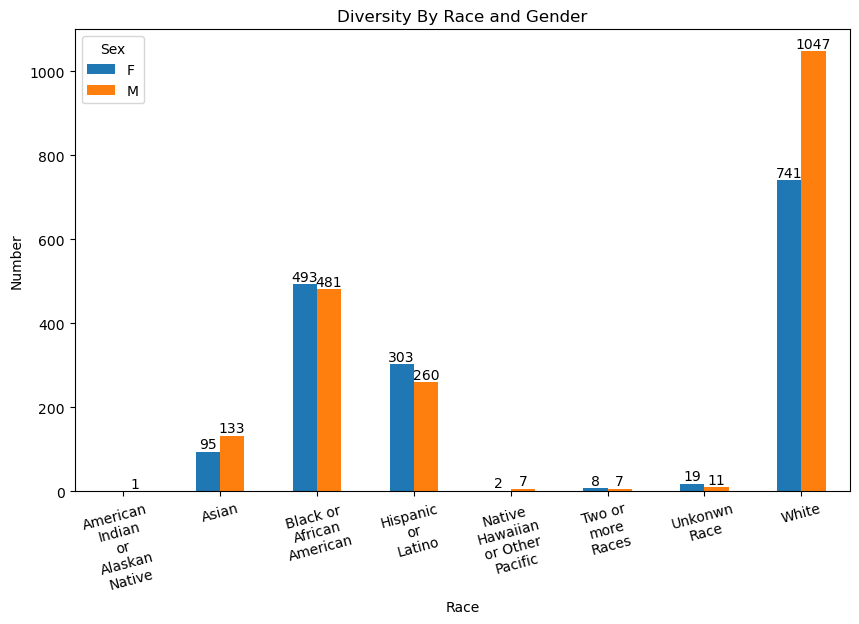

In [16]:
pt1 = race_sex_cts.pivot_table(
    index = 'Race',
    columns='Sex',
    values='cts',
    fill_value= 0)

graph1 = pt1.plot(kind='bar',figsize=(10,6))
graph1.set_xticklabels(wrapText(pt1.index), rotation = 15)
createLabel(graph1)


plt.title("Diversity By Race and Gender")
plt.xlabel("Race")
plt.ylabel("Number")
plt.show()

In [17]:
pt1

Sex,F,M
Race,,
American Indian or Alaskan Native,0,1
Asian,95,133
Black or African American,493,481
Hispanic or Latino,303,260
Native Hawaiian or Other Pacific,2,7
Two or more Races,8,7
Unkonwn Race,19,11
White,741,1047


In [33]:
import math
min_year = math.floor(df.StartYear.min() / 10) * 10
max_year= math.ceil(df.StartYear.max()/ 10)  * 10
bin = list(range(min_year, max_year+ 10,10))


In [34]:
year_label = ['1960-1970',
 '1970-1980',
 '1980-1990',
 '1990-2000',
 '2000-2010',
 '2010-2020']

In [35]:
df['StartYear Between'] = pd.cut(df['StartYear'], bins=bin, labels=year_label)
df.sample(10)

,JobTitle,Sex,Race,JobType,StartYear,StartYear Between
835,Librarian,F,White,Permanent-Full Time,1978,1970-1980
1382,Firefighter/EMT III,M,Black or African American,Permanent-Full Time,2002,2000-2010
1011,Public Health Nurse,F,Black or African American,Permanent-Full Time,2002,2000-2010
1873,Custodial Worker II,M,Black or African American,Permanent-Full Time,2009,2000-2010
3430,WSS Technician IV,M,Black or African American,Permanent-Full Time,2017,2010-2020
2950,Eligibility Worker,M,Black or African American,Permanent-Full Time,2016,2010-2020
2039,Zoning Inspector II,M,White,Permanent-Full Time,2011,2010-2020
1602,Tax Auditor III,F,White,Permanent-Full Time,2007,2000-2010
1599,Tax Assessor (Call Center),F,Hispanic or Latino,Permanent-Full Time,2007,2000-2010
3073,Librarian,F,White,Permanent-Full Time,2016,2010-2020


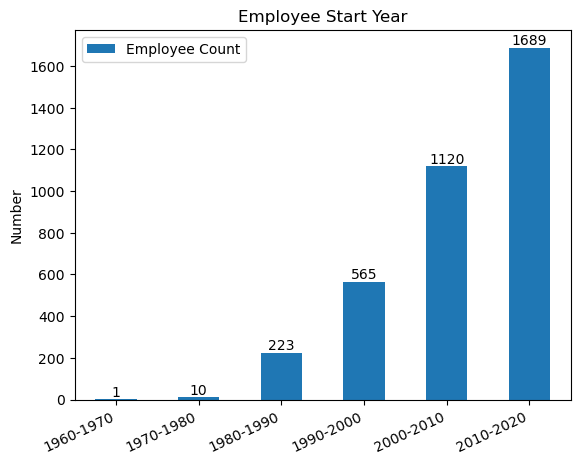

In [36]:
pt2 = df.pivot_table(
    index='StartYear Between',  # Grouping by year intervals
    aggfunc='size',            # Counting the rows
    sort=False                 # Maintain the order of the intervals as in the data
).reset_index(name="Employee Count")

graph2 = pt2.plot(kind = 'bar')
graph2.set_xticklabels(pt2['StartYear Between'], ha='right', rotation = 25, fontsize = 10)
graph2.set_title('Employee Start Year')
graph2.set_ylabel('Number')

createLabel(graph2)

plt.show()

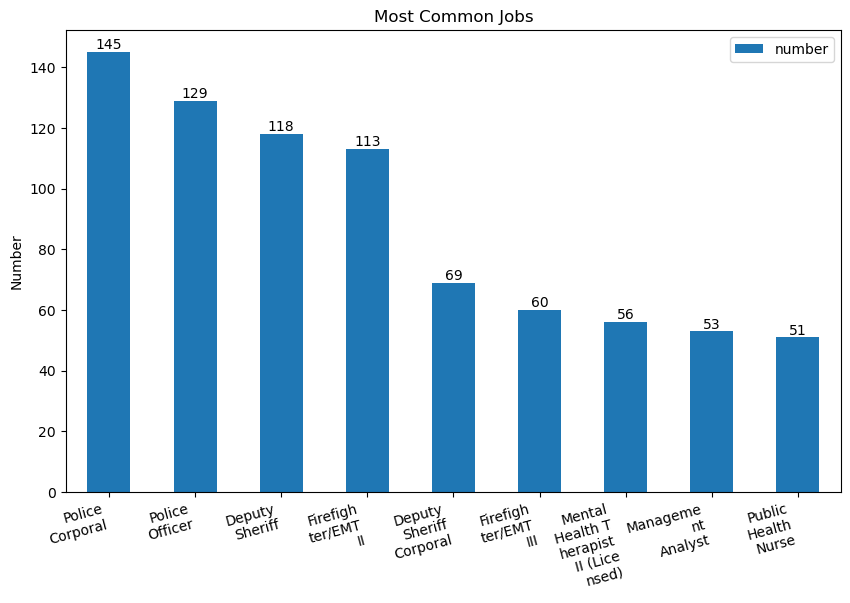

In [37]:
pt3 =df.pivot_table(
    index='JobTitle', 
    aggfunc='size',
    sort = True            # Counting the rows              # Maintain the order of the intervals as in the data
).reset_index(name = 'number').sort_values(by = 'number', ascending = False)


graph3 = pt3[:9].plot(kind = 'bar',figsize = (10,6))

graph3.set_ylabel('Number')
graph3.set_xticklabels(pt3['JobTitle'][:9], ha='right', rotation = 25, fontsize = 10)

graph3.set_xticklabels(wrapText(pt3['JobTitle'][:9]), rotation = 15)
createLabel(graph3)

graph3.set_title('Most Common Jobs')
plt.show()


In [38]:

pt4 = df.pivot_table(
    index='Race',          
    columns='JobTitle',  
    aggfunc='size',        
    fill_value=0            
)

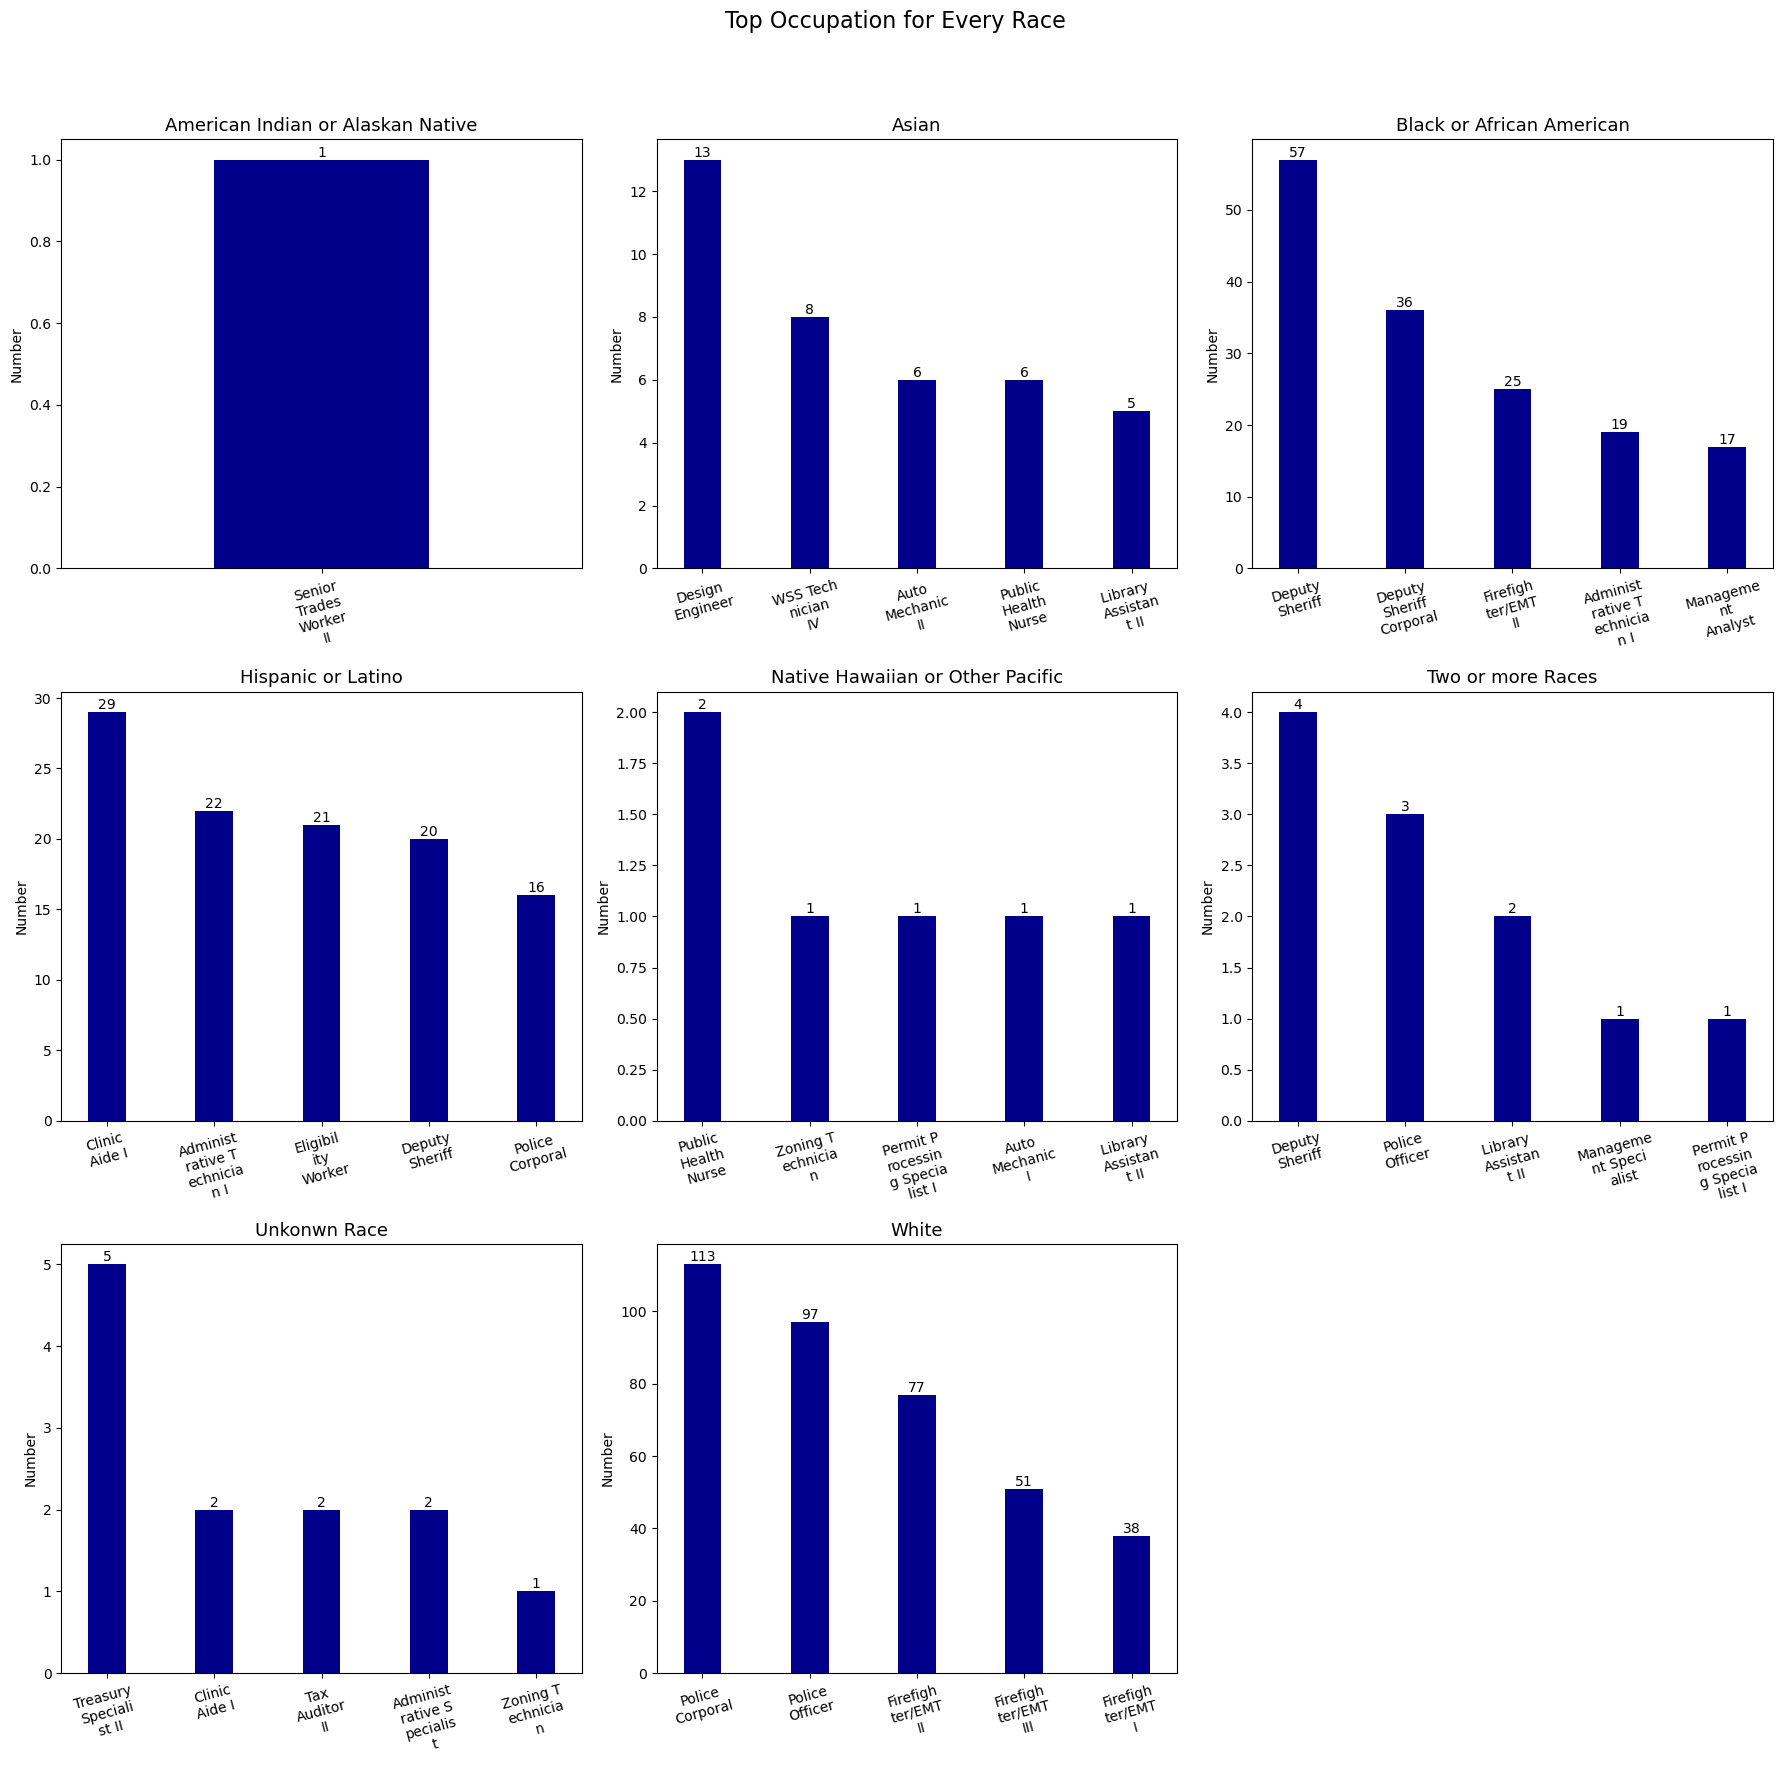

In [40]:
row_num = math.ceil(len(pt4.index)/3)
fig, axes = plt.subplots(row_num,3,figsize=(18, 6 * row_num))
fig.suptitle('Top Occupation for Every Race',fontsize = 16)
axes = axes.flatten()

for i, race in enumerate(pt4.index):
    filter1st = pt4.loc[race].sort_values(ascending = False)
    filter2nd = filter1st[filter1st > 0][:5]
    ax = axes[i] 
    filter2nd.plot(kind='bar', ax=ax, color='darkblue', width = 0.35)
    ax.set_xticklabels(wrapText(filter2nd.index), rotation=15)
    ax.set_title(race, fontsize = 13)
    ax.set_ylabel('Number')
    ax.xaxis.label.set_visible(False)
    createLabel(ax)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


